In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
%cd /content/gdrive/MyDrive/cs4262/EmotionDetection

/content/gdrive/MyDrive/cs4262/EmotionDetection


In [10]:
pip install -r requirements.txt

In [11]:
%cd /content/gdrive/MyDrive/cs4262/EmotionDetection/datasets

/content/gdrive/MyDrive/cs4262/EmotionDetection/datasets


In [12]:
ls -l

total 52550
-rwx------ 1 root root      171 Mar  3 00:31 getDataset.sh*
drwx------ 4 root root     4096 Feb 18 22:15 processedDataset/
-rw------- 1 root root 51961187 Mar  3 01:40 processedDataset.rar
-rw------- 1 root root   372902 Mar  3 00:31 test_data.csv
-rw------- 1 root root  1471961 Mar  3 00:31 train_data.csv


In [ ]:
!chmod +x getDataset.sh

In [13]:
! bash getDataset.sh

--2024-03-03 03:01:41--  https://www.dropbox.com/scl/fi/l8qkvnnjc8v586ivp01o5/processedDataset.rar?rlkey=31juifb06s30eq6os7diakcgb&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8533ec5b3750997fd397ef2ac9.dl.dropboxusercontent.com/cd/0/inline/COU_A3I9NG6cz46jrT2hKQeLOfu3ED5SM9Hp3wFtV2PQygqNeoaxxFuQGHMKfg6bS_vLVw1JEY-TFRX-L3rKF9L3OxpljmorCKjG3x3GxdsQPh3foVJ5EfUhvqSnkKdY-nmGpewVERf-QIivowFWjZHY/file# [following]
--2024-03-03 03:01:42--  https://uc8533ec5b3750997fd397ef2ac9.dl.dropboxusercontent.com/cd/0/inline/COU_A3I9NG6cz46jrT2hKQeLOfu3ED5SM9Hp3wFtV2PQygqNeoaxxFuQGHMKfg6bS_vLVw1JEY-TFRX-L3rKF9L3OxpljmorCKjG3x3GxdsQPh3foVJ5EfUhvqSnkKdY-nmGpewVERf-QIivowFWjZHY/file
Resolving uc8533ec5b3750997fd397ef2ac9.dl.dropboxusercontent.com (uc8533ec5b3750997fd397ef2ac9.dl.dropboxusercontent.com)... 162.125

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score

# Load training data from CSV
train_df = pd.read_csv("/content/gdrive/MyDrive/cs4262/EmotionDetection/datasets/train_data.csv") # Replace with your own path to train_data.csv

# Load testing data from CSV
test_df = pd.read_csv("/content/gdrive/MyDrive/cs4262/EmotionDetection/datasets/test_data.csv") # Replace with your own path to test_data.csv

# Load images and labels from training data
train_images = []
train_labels = []

for index, row in train_df.iterrows():
    image = load_img(row['trainSet'], target_size=(32, 32))  # Adjust target_size as needed
    image = img_to_array(image) / 255.0  # Normalize pixel values
    train_images.append(image)
    train_labels.append(row['trainLabel'])

train_images = np.array(train_images)

# Label encoding
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
train_labels = to_categorical(train_labels_encoded)  # One-hot encode labels

# Load images and labels from testing data
test_images = []
test_labels = []

for index, row in test_df.iterrows():
    image = load_img(row['testSet'], target_size=(32, 32))  # Adjust target_size as needed
    image = img_to_array(image) / 255.0  # Normalize pixel values
    test_images.append(image)
    test_labels.append(row['testabel'])

test_images = np.array(test_images)

# Label encoding for test labels
test_labels_encoded = label_encoder.transform(test_labels)
test_labels = to_categorical(test_labels_encoded)  # One-hot encode labels

# Split training data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.1, random_state=42)


Epoch 1/100
281/281 [==============================] - 19s 51ms/step - loss: 1.8110 - accuracy: 0.2758 - val_loss: 1.7925 - val_accuracy: 0.2845
Epoch 2/100
281/281 [==============================] - 12s 42ms/step - loss: 1.7900 - accuracy: 0.2806 - val_loss: 1.8029 - val_accuracy: 0.2845
Epoch 3/100
281/281 [==============================] - 12s 43ms/step - loss: 1.7701 - accuracy: 0.2835 - val_loss: 1.7554 - val_accuracy: 0.2865
Epoch 4/100
281/281 [==============================] - 12s 43ms/step - loss: 1.7540 - accuracy: 0.2859 - val_loss: 1.7239 - val_accuracy: 0.3095
Epoch 5/100
281/281 [==============================] - 11s 40ms/step - loss: 1.7381 - accuracy: 0.2926 - val_loss: 1.7222 - val_accuracy: 0.3010
Epoch 6/100
281/281 [==============================] - 11s 39ms/step - loss: 1.7190 - accuracy: 0.3064 - val_loss: 1.6822 - val_accuracy: 0.3245
Epoch 7/100
281/281 [==============================] - 12s 42ms/step - loss: 1.6965 - accuracy: 0.3170 - val_loss: 1.6919 - val_ac

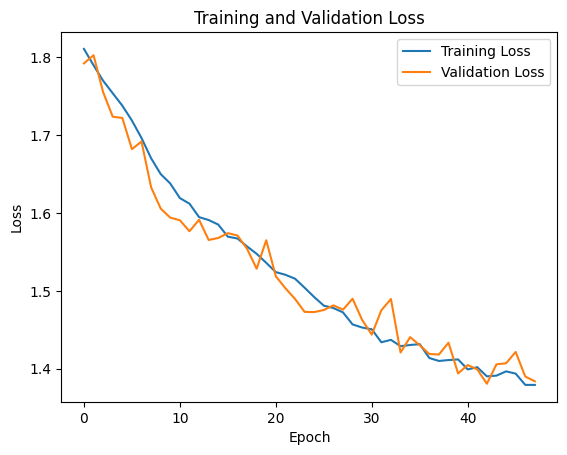

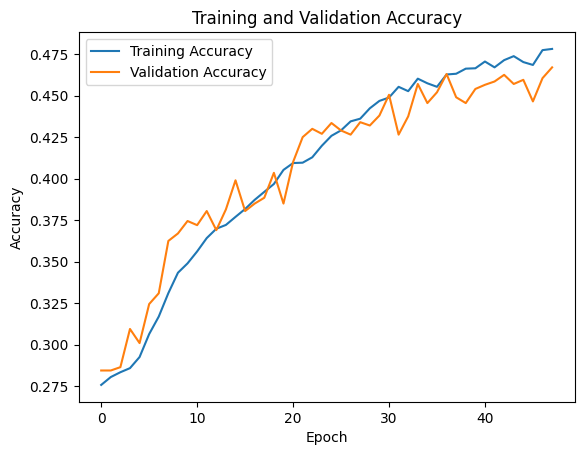

In [15]:
# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)

# Define early stopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model with data augmentation and early stopping
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64, shuffle=True),
                    steps_per_epoch=len(train_images) // 64,
                    epochs=100,
                    validation_data=(val_images, val_labels),
                    callbacks=[early_stopping])

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot the loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import f1_score

# Make predictions on test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Compute F1 score
f1 = f1_score(np.argmax(test_labels, axis=1), predicted_labels, average='weighted')
print(f'F1 score: {f1}')

156/156 [==============================] - 1s 3ms/step
F1 score: 0.4420854605282822


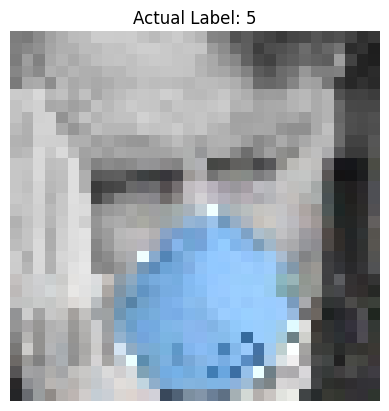

1/1 [==============================] - 0s 18ms/step
Predicted Label: Happy, Confidence: 0.31035327911376953


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate a random index to select a random image from the test dataset
image_index = random.randint(0, len(test_images) - 1)

# Selected the random image and its corresponding label
selected_image = test_images[image_index]
selected_label = np.argmax(test_labels[image_index])

# Display the random image
plt.imshow(selected_image)
plt.axis('off')
plt.title(f'Actual Label: {selected_label}')
plt.show()

# Make a prediction on the selected image
prediction = model.predict(np.expand_dims(selected_image, axis=0))
predicted_label = np.argmax(prediction)
confidence = np.max(prediction)

# Mapping from label indices to class names
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral',
               'Sad', 'Surprise']

# Display the model's prediction with the name of the animal
print(f"Predicted Label: {class_names[predicted_label]}, Confidence: {confidence}")
